# Content 

1. Importing all necessary libraries
2. Loading and preprocessing the Dataset
3. Data Visualization
4. shuffling the data
5. Splitting the data into train and test data

6. Model Building
6.1  VGG16
6.2  Resnet50
6.3  VGG19

7. Conclusion

# 1. Importing all necessary libraries

In [8]:
#Import the necessary libraries first


import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model

from keras import backend as K
import shutil
import glob
import re

In [9]:
data = 'C:/Users/neha srivastav/Downloads/Pothole detection project'
normal = 'C:/Users/neha srivastav/Downloads/Pothole detection project/normal'
potholes = 'C:/Users/neha srivastav/Downloads/Pothole detection project/potholes'

# 2. Loading and preprocessing the data

In [10]:
dirlist=[normal, potholes]
classes=['No', 'Yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):

    filelist=os.listdir(i)
    print(filelist)
    print('\n')
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)
    

['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '12.jpg', '120.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '13.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '135.jpg', '136.jpg', '137.jpg', '138.jpg', '139.jpg', '14.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '145.jpg', '146.jpg', '147.jpg', '148.jpg', '149.jpg', '15.jpg', '150.jpg', '151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '16.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '168.jpg', '169.jpg', '17.jpg', '170.jpg', '171.jpg', '172.jpg', '173.jpg', '174.jpg', '175.jpg', '176.jpg', '177.jpg', '178.jpg', '179.jpg', '18.jpg', '180.jpg', '181.jpg'

In [11]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)

In [12]:
df['labels']=pd.get_dummies(df['labels'])

# 3. Data Visualization

<Figure size 288x288 with 0 Axes>

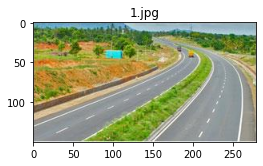

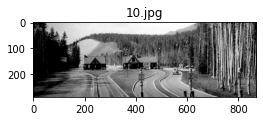

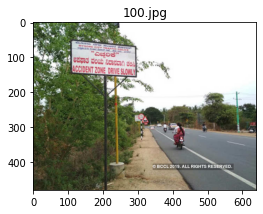

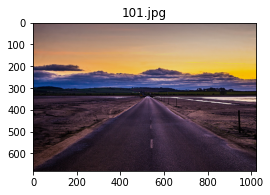

In [13]:
plt.figure(figsize=(4,4))
for i in range(0,4):
    fig, ax = plt.subplots(figsize=(4,4))
    img = mpimg.imread(df['filepaths'][i])
    img_name = re.sub(r'^\D+','',df['filepaths'][i])
    ax.imshow(img)
    ax.set_title(img_name)

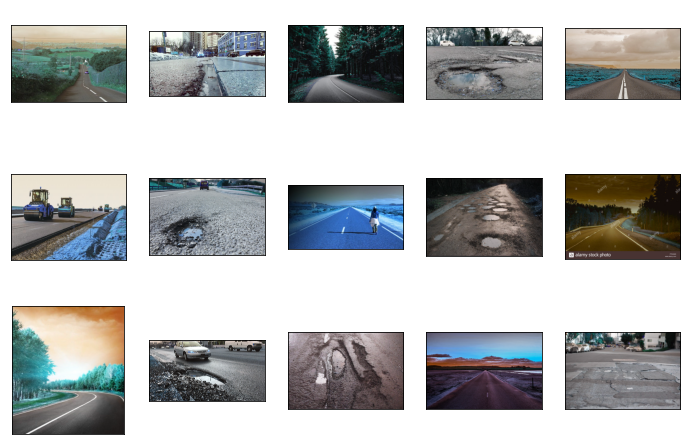

In [14]:
#visualize brain tumor images
import cv2
plt.figure(figsize=(12,8))
for i in range(15):
    random = np.random.randint(1,len(df))
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"filepaths"]))
    plt.title(df.loc[random, "labels"], size = 15, color = "white") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [15]:
from PIL import Image
widths = []
heights = []
for idx, row in df.iterrows():
    path = row['filepaths']
    im = Image.open(path)
    width, height = im.size
    widths.append(width)
    heights.append(height)
avg_width = int(sum(widths) / len(widths))
avg_height = int(sum(heights) / len(heights))
print(avg_width, avg_height)

1006 659


In [16]:
from keras.preprocessing.image import load_img

# Image Resize Function
def load_resize_color_image(path):
    # load image and resize to 300x300
    image = load_img(path,target_size=(300,300))
    return image


In [17]:
image_list =[]
pre_list =[]
from keras.preprocessing.image import img_to_array
for idx, row in df.iterrows():
    path = row['filepaths']
    pre = row['labels']
    image = load_resize_color_image(path)
    # turn image to array
    image_array = img_to_array(image)   
    image_list.append(image_array)
    pre_list.append(pre)

In [18]:
print(image_list[0:5])

[array([[[231., 246., 255.],
        [199., 217., 239.],
        [215., 239., 255.],
        ...,
        [229., 243., 244.],
        [210., 220., 221.],
        [239., 248., 247.]],

       [[231., 246., 255.],
        [199., 217., 239.],
        [215., 239., 255.],
        ...,
        [229., 243., 244.],
        [210., 220., 221.],
        [239., 248., 247.]],

       [[201., 220., 237.],
        [140., 163., 181.],
        [134., 162., 184.],
        ...,
        [169., 183., 184.],
        [168., 178., 179.],
        [217., 226., 225.]],

       ...,

       [[212., 215., 220.],
        [158., 161., 166.],
        [157., 161., 164.],
        ...,
        [148., 143., 137.],
        [158., 153., 147.],
        [226., 221., 215.]],

       [[252., 255., 255.],
        [219., 222., 227.],
        [230., 234., 237.],
        ...,
        [233., 228., 222.],
        [218., 213., 207.],
        [255., 254., 248.]],

       [[252., 255., 255.],
        [219., 222., 227.],
        [230., 

In [19]:
print(pre_list[0:5])

[1, 1, 1, 1, 1]


# 4. Shuffling the data

In [20]:
from sklearn.utils import shuffle
image_list, pre_list = shuffle(image_list, pre_list)

In [21]:
X_data = np.array(image_list)
y_data = np.array(pre_list)

<AxesSubplot:ylabel='count'>

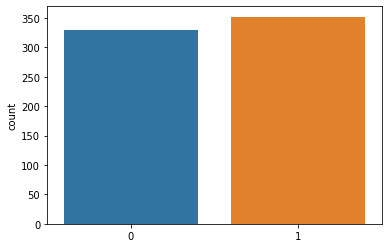

In [22]:
import seaborn as sns
sns.countplot(y_data)

In [23]:
print(X_data.shape)
print(y_data.shape)

(681, 300, 300, 3)
(681,)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=0)

In [25]:
print(X_train.shape)
print(y_train.shape)

(544, 300, 300, 3)
(544,)


# 5. Data Normalization

In [26]:
X_train = X_train/255
X_test = X_test/255

In [27]:
print(X_test.shape)
print(y_test.shape)

(137, 300, 300, 3)
(137,)


# 6. Model Building

# 6.1 Resnet 50

In [56]:

from keras.applications.resnet50 import ResNet50 
from keras import Model, layers
from keras.optimizers import SGD

conv_base = ResNet50(

    include_top=False, weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False
    
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(1, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), 
              loss='binary_crossentropy', metrics=['acc'])


history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 544 samples, validate on 137 samples
Epoch 1/30
544/544 [==============================] - 171s 315ms/step - loss: 0.7329 - acc: 0.6305 - val_loss: 0.5131 - val_acc: 0.8321
Epoch 2/30
544/544 [==============================] - 121s 223ms/step - loss: 0.4877 - acc: 0.8125 - val_loss: 0.5523 - val_acc: 0.7810
Epoch 3/30
544/544 [==============================] - 108s 199ms/step - loss: 0.4633 - acc: 0.8272 - val_loss: 0.5076 - val_acc: 0.8029
Epoch 4/30
544/544 [==============================] - 201s 370ms/step - loss: 0.4419 - acc: 0.8199 - val_loss: 0.5137 - val_acc: 0.7591
Epoch 5/30
544/544 [==============================] - 233s 429ms/step - loss: 0.3313 - acc: 0.8842 - val_loss: 0.5075 - val_acc: 0.8029
Epoch 6/30
544/544 [==============================] - 187s 344ms/step - loss: 0.2529 - acc: 0.9136 - val_loss: 0.3623 - val_acc: 0.8467
Epoch 7/30
544/544 [==============================] - 204s 375ms/step - loss: 0.1571 - acc: 0.9559 - val_loss: 0.6617 - val_acc: 0.8175
Ep

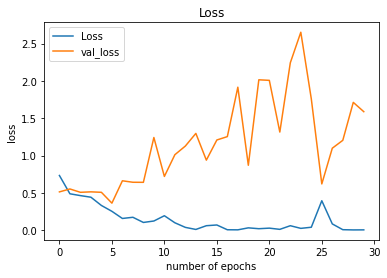

In [57]:
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.title("Loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

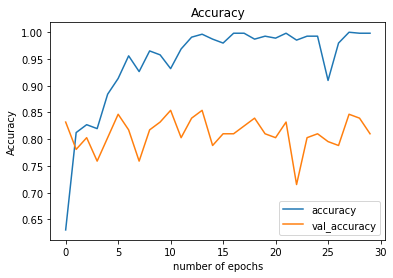

In [58]:
plt.plot(history.history['acc'],label="accuracy")
plt.plot(history.history['val_acc'],label="val_accuracy")
plt.title("Accuracy")
plt.xlabel("number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [59]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5876683310000566
Test accuracy: 0.8102189898490906


# 6.2 VGG 16

In [35]:
epochs = 30
batch_size = 10
input_shape = (300,300,3)

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=95,
    restore_best_weights=True
)

In [52]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7)

In [39]:
from tensorflow.keras.applications import vgg16
def create_vgg16():  
  model = vgg16.VGG16(include_top=True, weights=None, input_tensor=None, 
                      input_shape=(300,300,3), 
                      pooling="max", classes=2)

  return model

vgg16_model = create_vgg16()  
vgg16_model.compile(loss='binary_crossentropy', optimizer='adam',
                    metrics=['acc'])  


vgg16 = vgg16_model.fit(x=X_train,
                        y=y_train, batch_size=32,
                        epochs=10, verbose=1,
                        validation_data=(X_test, y_test), 
                        shuffle=True,
                        callbacks=[learning_rate_reduction,
                                                custom_early_stopping]) 
#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 544 samples, validate on 137 samples
Epoch 1/30
544/544 [==============================] - 347s 638ms/step - loss: 0.7805 - acc: 0.5680 - val_loss: 0.5616 - val_acc: 0.7299
Epoch 2/30
544/544 [==============================] - 213s 391ms/step - loss: 0.5120 - acc: 0.7794 - val_loss: 0.9866 - val_acc: 0.6496
Epoch 3/30
544/544 [==============================] - 146s 269ms/step - loss: 0.4765 - acc: 0.8199 - val_loss: 0.4254 - val_acc: 0.8175
Epoch 4/30
544/544 [==============================] - 128s 235ms/step - loss: 0.2839 - acc: 0.8842 - val_loss: 0.3136 - val_acc: 0.8467
Epoch 5/30
544/544 [==============================] - 119s 219ms/step - loss: 0.2083 - acc: 0.9210 - val_loss: 0.3918 - val_acc: 0.8394
Epoch 6/30
544/544 [==============================] - 182s 334ms/step - loss: 0.1492 - acc: 0.9449 - val_loss: 0.4324 - val_acc: 0.8540
Epoch 7/30
544/544 [==============================] - 186s 341ms/step - loss: 0.1258 - acc: 0.9504 - val_loss: 0.5391 - val_acc: 0.8394
Ep

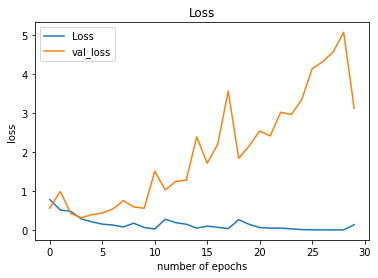

In [40]:
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.title("Loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

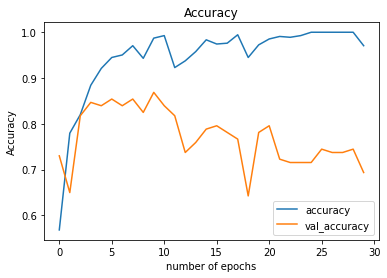

In [41]:
plt.plot(history.history['acc'],label="accuracy")
plt.plot(history.history['val_acc'],label="val_accuracy")
plt.title("Accuracy")
plt.xlabel("number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5053969525942837
Test accuracy: 0.8905109763145447


# 6.3 VGG 19

In [6]:
def create_model():
    img_input = Input(shape=(300, 300, 3))

    # Block 1
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='block1_conv1', trainable=False)(img_input)
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='block1_conv2', trainable=False)(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block1_pool', trainable=False)(x)

    #Block 2
    x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='block2_conv1',trainable=False)(x)
    x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='block2_conv2', trainable=False)(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block2_pool', trainable=False)(x)

    #Block 3
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='block3_conv1',trainable=False)(x)
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='block3_conv2', trainable=False)(x)
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='block3_conv3', trainable=False)(x)
    x = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='block3_conv4', trainable=False)(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block3_pool', trainable=False)(x)

    #Block 4
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block4_conv1')(x)
    x = BatchNormalization(name='block4_bn1')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block4_conv2')(x)
    x = BatchNormalization(name='block4_bn2')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block4_conv3')(x)
    x = BatchNormalization(name='block4_bn3')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block4_conv4')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block4_pool')(x)

    #Block 5
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block5_conv1')(x)
    x = BatchNormalization(name='block5_bn1')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block5_conv2')(x)
    x = BatchNormalization(name='block5_bn2')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block5_conv3')(x)
    x = BatchNormalization(name='block5_bn3')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', name='block5_conv4')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='block5_pool')(x)
    
    #Other layers
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dropout(0.7, name='dropout_1')(x)
    x = Dense(1000, activation='relu', name='fc2')(x)
    x = Dropout(0.7, name='dropout_2')(x)
    x = Dense(512, activation='relu', name='fc3')(x)
    x = Dropout(0.5, name='dropout_3')(x)
    x = Dense(1, activation='sigmoid', name='predictions')(x)
    
    model = Model(inputs=img_input, outputs=x)
    return model

In [7]:
#Model configuration for training purpose
base_model = VGG19(weights='imagenet', include_top=False)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

In [9]:
model.fit(X_train, y_train, epochs=30, batch_size=12, verbose=2, 
         validation_data=(X_test, y_test))

Train on 510 samples, validate on 170 samples
Epoch 1/30
 - 4s - loss: 3.4113 - accuracy: 0.5431 - val_loss: 0.6609 - val_accuracy: 0.5765
Epoch 2/30
 - 1s - loss: 0.6125 - accuracy: 0.6549 - val_loss: 0.3734 - val_accuracy: 0.9000
Epoch 3/30
 - 1s - loss: 0.4665 - accuracy: 0.7784 - val_loss: 0.4184 - val_accuracy: 0.8059
Epoch 4/30
 - 0s - loss: 0.4652 - accuracy: 0.7980 - val_loss: 0.4811 - val_accuracy: 0.7471
Epoch 5/30
 - 0s - loss: 0.5505 - accuracy: 0.7294 - val_loss: 0.5553 - val_accuracy: 0.5529
Epoch 6/30
 - 0s - loss: 0.5050 - accuracy: 0.7588 - val_loss: 0.3761 - val_accuracy: 0.8294
Epoch 7/30
 - 0s - loss: 0.4072 - accuracy: 0.8216 - val_loss: 0.2525 - val_accuracy: 0.8765
Epoch 8/30
 - 0s - loss: 0.3663 - accuracy: 0.8510 - val_loss: 0.3846 - val_accuracy: 0.8706
Epoch 9/30
 - 0s - loss: 0.3607 - accuracy: 0.8353 - val_loss: 0.4348 - val_accuracy: 0.8941
Epoch 10/30
 - 0s - loss: 0.3156 - accuracy: 0.8804 - val_loss: 0.2406 - val_accuracy: 0.9235
Epoch 11/30
 - 0s - los

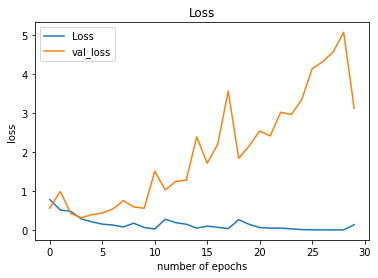

In [47]:
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.title("Loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

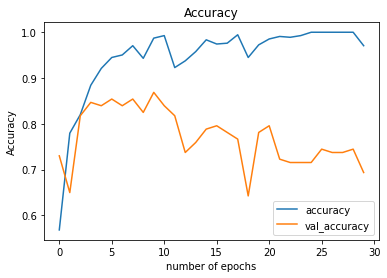

In [48]:
plt.plot(history.history['acc'],label="accuracy")
plt.plot(history.history['val_acc'],label="val_accuracy")
plt.title("Accuracy")
plt.xlabel("number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:

loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

170/170 [==============================] - 0s 695us/step
Test accuracy: 84.71%


# 7. Conclusion

In [60]:
models = pd.DataFrame({"Model":['VGG19','ResNet50','VGG16'],
           "Accuracy":[84.71,81.02, 89.05]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,VGG16,89.05
0,VGG19,84.71
1,ResNet50,81.02


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

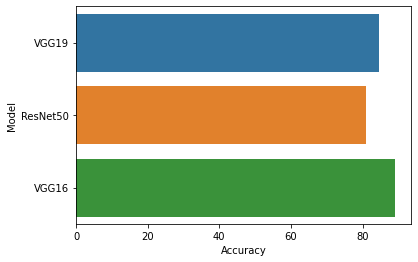

In [61]:
sns.barplot(x= 'Accuracy', y= 'Model', data= models)

It has been observed that VGG16 gives highest accuracy and Resnet50 gives less accuracy.